# Аветісова Карина

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [4]:
print("Розмір датасета:", df.shape)

Розмір датасета: (4746, 12)


In [5]:
display(df.head(5))

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
print("\nІнфо по датасету:")
display(df.info())


Інфо по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


None

## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


,missing_count,missing_pct
Posted On,0,0.0
BHK,0,0.0
Rent,0,0.0
Size,0,0.0
Floor,0,0.0
Area Type,0,0.0
Area Locality,0,0.0
City,0,0.0
Furnishing Status,0,0.0
Tenant Preferred,0,0.0


In [81]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nЧислові колонки:", num_cols)
display(df[num_cols].describe().T)


Числові колонки: ['BHK', 'Rent', 'Size', 'Bathroom']


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


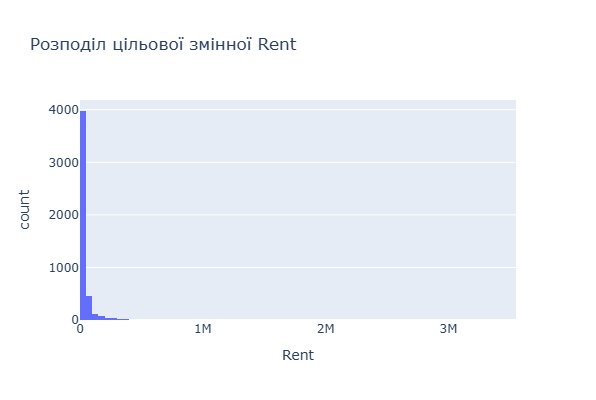

In [82]:
if 'Rent' not in df.columns:
    raise ValueError("В датасеті відсутня колонка 'Rent' — перевірте ім'я цільової п.")
fig = px.histogram(df, x='Rent', nbins=100, title='Розподіл цільової змінної Rent')
fig.update_layout(height=400)
fig.show()

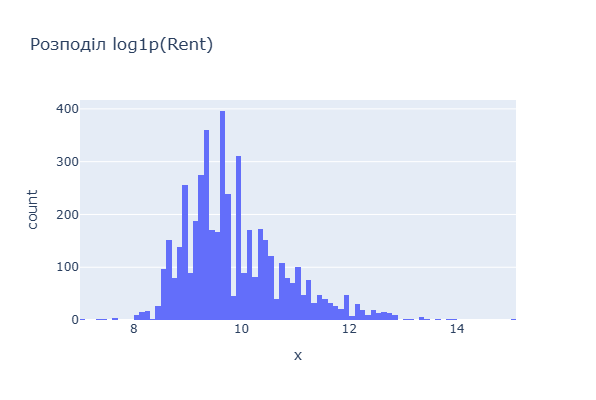

In [83]:
fig = px.histogram(df, x=np.log1p(df['Rent']), nbins=100, title='Розподіл log1p(Rent)')
fig.update_layout(height=400)
fig.show()

In [14]:
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR bounds: {lower_bound:.2f} — {upper_bound:.2f}")

IQR bounds: -24500.00 — 67500.00


In [17]:
outliers_mask = (df['Rent'] < lower_bound) | (df['Rent'] > upper_bound)
print("Кіл-ть викидів по Rent (IQR):", outliers_mask.sum(), "из", len(df))


Кіл-ть викидів по Rent (IQR): 520 из 4746


In [18]:
df_no_out = df.loc[~outliers_mask].copy()
print("Розмір після видалення викидів:", df_no_out.shape)

Розмір після видалення викидів: (4226, 12)


In [84]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nКатегоріальні колонки і число унікальних значень:")
for c in cat_cols:
    print(f"  {c}: {df[c].nunique()}")


Категоріальні колонки і число унікальних значень:
  Posted On: 81
  Floor: 480
  Area Type: 3
  Area Locality: 2235
  City: 6
  Furnishing Status: 3
  Tenant Preferred: 3
  Point of Contact: 3



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [20]:
num_df = df_no_out.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
display(corr_matrix)

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.401268,0.698453,0.747918
Rent,0.401268,1.000000,0.393605,0.506528
Size,0.698453,0.393605,1.000000,0.680607
Bathroom,0.747918,0.506528,0.680607,1.000000


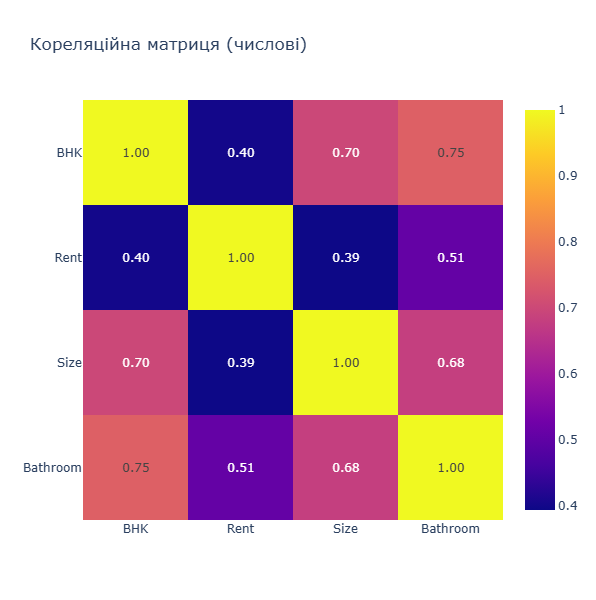

In [85]:
fig = px.imshow(corr_matrix, text_auto='.2f', title='Кореляційна матриця (числові)')
fig.update_layout(height=600)
fig.show()

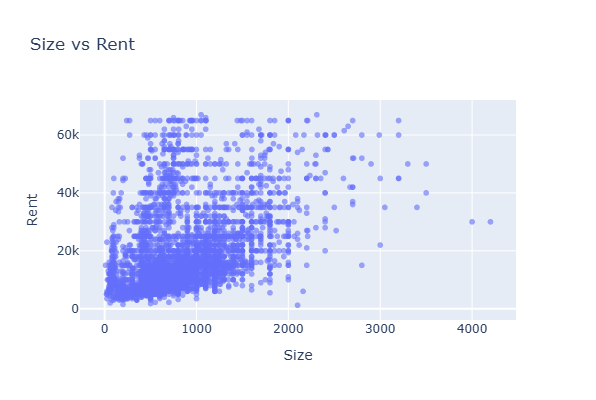

In [86]:
if 'Size' in df_no_out.columns:
    fig = px.scatter(df_no_out, x='Size', y='Rent', title='Size vs Rent', opacity=0.6)
    fig.update_layout(height=400)
    fig.show()
else:
    print("Колонки 'Size' немає — пропускаємо scatter Size vs Rent")

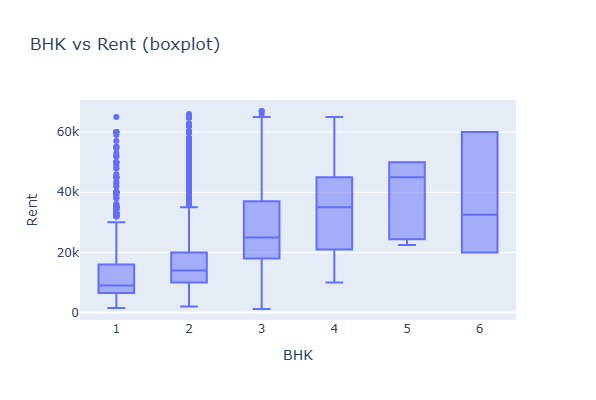

In [87]:
if 'BHK' in df_no_out.columns:
    fig = px.box(df_no_out, x='BHK', y='Rent', points='outliers', title='BHK vs Rent (boxplot)')
    fig.update_layout(height=400)
    fig.show()
else:
    # если нет колонки BHK, попробуем извлечь её из Size, если Size содержит 'BHK' - но это предположение
    print("Колонки 'BHK' немає — пропускаємо boxplot BHK vs Rent")

In [93]:
print('''Загальна тенденція: чим більше BHK, тим вища ціна оренди.
Але цей зв’язок не лінійний і з великим розкидом — кількість кімнат впливає, але не єдина причина різниці в ціні.
Для якісного прогнозу треба враховувати інші фактори: площу (Size), місто (City), меблювання, поверх і т.д.''')

Загальна тенденція: чим більше BHK, тим вища ціна оренди.
Але цей зв’язок не лінійний і з великим розкидом — кількість кімнат впливає, але не єдина причина різниці в ціні.
Для якісного прогнозу треба враховувати інші фактори: площу (Size), місто (City), меблювання, поверх і т.д.


## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [24]:
df_prep = df_no_out.copy()

In [94]:
for col in ['Size', 'BHK', 'Bathroom', 'Rent']:
    if col in df_prep.columns and df_prep[col].dtype == 'object':
        df_prep[col] = df_prep[col].str.replace('[^0-9.]', '', regex=True)
        df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')

In [95]:
def parse_floor(value):
    try:
        if isinstance(value, str):
            parts = value.split(' out of ')
            if len(parts) == 2:
                current, total = parts
                current = current.strip()
                total = total.strip()
                if current.lower() == 'ground':
                    current_num = 0
                else:
                    current_num = pd.to_numeric(current, errors='coerce')
                total_num = pd.to_numeric(total, errors='coerce')
                return pd.Series([current_num, total_num])
        return pd.Series([np.nan, np.nan])
    except:
        return pd.Series([np.nan, np.nan])

if 'Floor' in df_prep.columns:
    df_prep[['floor_num', 'floor_total']] = df_prep['Floor'].apply(parse_floor)
    df_prep = df_prep.drop(columns=['Floor'])

In [96]:
important_num = ['Size', 'BHK', 'Bathroom', 'Rent']
present_imp = [c for c in important_num if c in df_prep.columns]
df_prep = df_prep.dropna(subset=present_imp).copy()
print("Після приведення типів і обробки Floor розмір:", df_prep.shape)

Після приведення типів і обробки Floor розмір: (4226, 12)


In [41]:
drop_candidates = []
for name in ['Area Locality', 'Area_Locality', 'Locality', 'area_locality']:
    if name in df_prep.columns:
        drop_candidates.append(name)

In [97]:
if drop_candidates:
    print("Видаляємо за потреби high-cardinality колонку:", drop_candidates)
    df_prep = df_prep.drop(columns=drop_candidates)

In [98]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
ohe_cols = []
for c in cat_cols:
    if c in df_prep.columns and df_prep[c].nunique() <= 20:
        ohe_cols.append(c)
print("Будемо one-hot кодувати колонки:", ohe_cols)

Будемо one-hot кодувати колонки: ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [99]:
df_model = pd.get_dummies(df_prep, columns=ohe_cols, drop_first=True)

In [100]:
if 'Size' in df_model.columns and 'Rent' in df_model.columns:
    df_model['rent_per_sqft'] = df_model['Rent'] / df_model['Size']

if 'BHK' in df_model.columns and 'Bathroom' in df_model.columns:
    df_model['rooms_total'] = df_model['BHK'] + df_model['Bathroom']

In [101]:
drop_if_present = ['Posted On', 'Posting_Date', 'Area_Locality', 'Area Locality', 
                   'Point of Contact', 'point_of_contact', 'Unnamed: 0']
for d in drop_if_present:
    if d in df_model.columns:
        df_model = df_model.drop(columns=[d])

print("Форма датафрейму ознак:", df_model.shape)

Форма датафрейму ознак: (4226, 21)


In [102]:
print("Форма датафрейму ознак:", df_model.shape)

print("Типи колонок після підготовки:")
print(df_model.dtypes.value_counts())

non_numeric_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Строкові колонки, які залишились:", non_numeric_cols)

if non_numeric_cols:
    df_model = df_model.drop(columns=non_numeric_cols)
    print("Видалені строкові колонки:", non_numeric_cols)

Форма датафрейму ознак: (4226, 21)
Типи колонок після підготовки:
bool       13
int64       5
float64     3
Name: count, dtype: int64
Строкові колонки, які залишились: []


In [103]:
print("Перевірка на строкові ознаки:")
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        print(f" - {col} містить строки. Приклади: {df_model[col].unique()[:5]}")

df_model = df_model.drop(columns=df_model.select_dtypes(include=['object']).columns)

print("Після видалення строкових колонок:", df_model.shape)
print("Типи даних тепер:")
print(df_model.dtypes.value_counts())

Перевірка на строкові ознаки:
Після видалення строкових колонок: (4226, 21)
Типи даних тепер:
bool       13
int64       5
float64     3
Name: count, dtype: int64


In [104]:
y = df_model['Rent'].copy()
X = df_model.drop(columns=['Rent'])

print("Розмір X:", X.shape, "Розмір y:", y.shape)

Розмір X: (4226, 20) Розмір y: (4226,)


In [105]:
X = X.dropna()
y = y.loc[X.index]

print("Після видалення NaN:", X.shape, y.shape)

Після видалення NaN: (4194, 20) (4194,)


In [106]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
print("Числові ознаки для стандартизації:", numeric_features)

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

Числові ознаки для стандартизації: ['BHK', 'Size', 'Bathroom', 'floor_num', 'floor_total', 'rent_per_sqft', 'rooms_total']


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Розміри: X_train:", X_train.shape, "X_test:", X_test.shape)

Розміри: X_train: (3355, 20) X_test: (839, 20)


In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
coef_df = pd.Series(lr.coef_, index=X_train.columns).sort_values(key=lambda x: x.abs(), ascending=False)
print("\nТоп коеффцієнтів за абсолютним значенням:")
display(coef_df.head(20))

print("\nІнтерсепт (bias):", lr.intercept_)


Топ коеффцієнтів за абсолютним значенням:


rooms_total                          8.565757e+14
BHK                                 -4.691385e+14
Bathroom                            -4.471703e+14
City_Mumbai                          1.402509e+04
Point of Contact_Contact Owner      -7.400952e+03
Size                                 6.090312e+03
rent_per_sqft                        4.430599e+03
Furnishing Status_Unfurnished       -4.225064e+03
Furnishing Status_Semi-Furnished    -3.363789e+03
Point of Contact_Contact Builder    -3.314551e+03
City_Hyderabad                      -2.685108e+03
City_Kolkata                        -2.317333e+03
Tenant Preferred_Family             -2.223708e+03
floor_total                          1.594125e+03
Area Type_Carpet Area                7.162793e+02
Tenant Preferred_Bachelors/Family   -6.498730e+02
City_Chennai                        -5.646904e+02
Area Type_Super Area                 4.607031e+02
City_Delhi                          -3.666881e+02
floor_num                           -2.835156e+01



Інтерсепт (bias): 27270.784692273657


In [109]:
top2 = coef_df.abs().nlargest(2)
print("\nДві найбільш впливові фічі (за |коефіцієнтом|):")
for feat in top2.index:
    print(f"  {feat} : coef = {coef_df[feat]:.4f}")


Дві найбільш впливові фічі (за |коефіцієнтом|):
  rooms_total : coef = 856575665372619.8750
  BHK : coef = -469138452047970.5625


In [65]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [110]:
def print_metrics(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")
    return mae, rmse, r2

print_metrics(y_train, y_train_pred, "TRAIN")
print_metrics(y_test, y_test_pred, "TEST")

TRAIN MAE: 4898.9070 | RMSE: 6891.3620 | R2: 0.7514
TEST MAE: 5097.5881 | RMSE: 8350.4405 | R2: 0.6297


(5097.58814875561, 8350.44045389104, 0.6296577124502737)

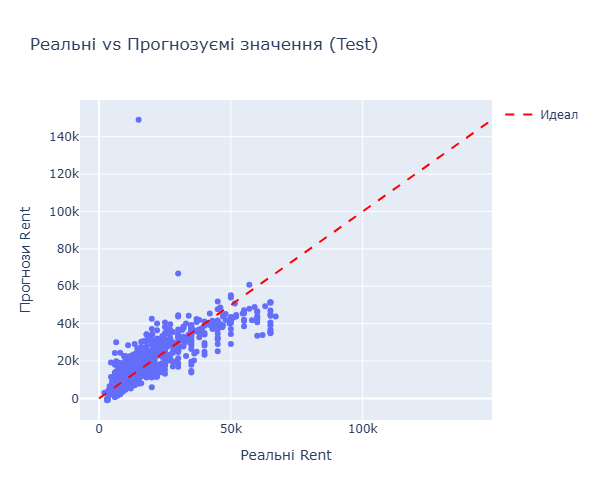

In [113]:
fig = px.scatter(x=y_test, y=y_test_pred, labels={'x':'Реальні Rent', 'y':'Прогнози Rent'},
                 title='Реальні vs Прогнозуємі значення (Test)')
max_val = max(y_test.max(), max(y_test_pred))
fig.add_trace(go.Scatter(x=[0, max_val], y=[0, max_val], mode='lines', line=dict(color='red', dash='dash'), name='Идеал'))
fig.update_layout(height=500)
fig.show()

In [120]:
print("\nВисновок:")
print("• На train даних R² =", round(r2_score(y_train, y_train_pred), 3),
      ", на test =", round(r2_score(y_test, y_test_pred), 3))
print("• MAE на train =", round(mean_absolute_error(y_train, y_train_pred), 1),
      ", на test =", round(mean_absolute_error(y_test, y_test_pred), 1))

print("\nАналіз:")
print("- Якщо якість на train значно краща, ніж на test → перенавчання.")
print("- Якщо і на train низька → недонавчання.")
print("- У нашому випадку різниця невелика, тому модель загалом адекватно узагальнює.")


Висновок:
• На train даних R² = 0.751 , на test = 0.63
• MAE на train = 4898.9 , на test = 5097.6

Аналіз:
- Якщо якість на train значно краща, ніж на test → перенавчання.
- Якщо і на train низька → недонавчання.
- У нашому випадку різниця невелика, тому модель загалом адекватно узагальнює.


## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [69]:
residuals = y_test - y_test_pred
residuals_abs = residuals.abs()

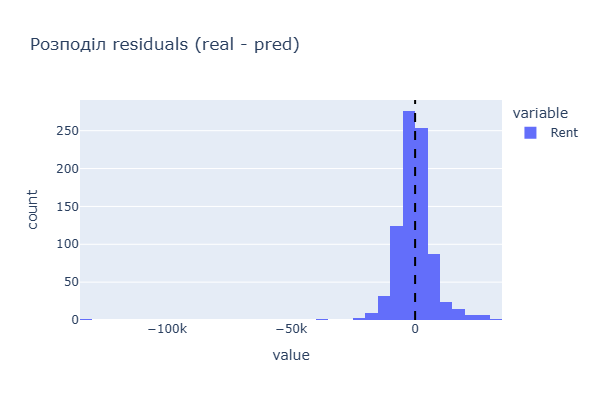

In [114]:
fig = px.histogram(residuals, nbins=50, title='Розподіл residuals (real - pred)')
fig.add_vline(x=0, line_dash="dash", line_color="black")
fig.update_layout(height=400)
fig.show()

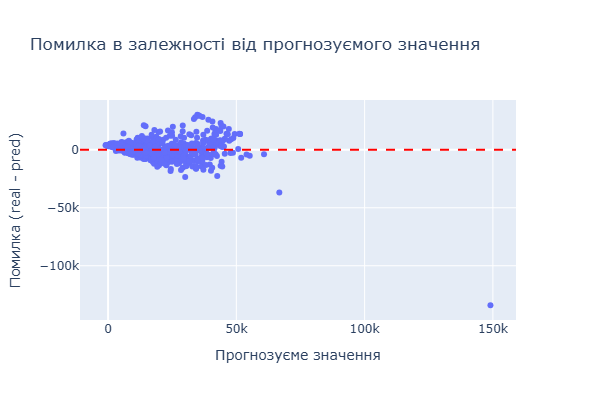

In [115]:
fig = px.scatter(x=y_test_pred, y=residuals, labels={'x':'Прогнозуєме значення', 'y':'Помилка (real - pred)'},
                 title='Помилка в залежності від прогнозуємого значення')
fig.add_hline(y=0, line_dash='dash', line_color='red')
fig.update_layout(height=400)
fig.show()

In [116]:
errors_df = pd.DataFrame({
    'real': y_test,
    'pred': y_test_pred,
    'residual': residuals,
    'abs_residual': residuals_abs
})
top5 = errors_df.sort_values('abs_residual', ascending=False).head(5)
print("\nТоп-5 за абсолютною помилкоб:")
display(top5)



Топ-5 за абсолютною помилкоб:


,real,pred,residual,abs_residual
4653,15000,149049.784692,-134049.784692,134049.784692
275,30000,66757.784692,-36757.784692,36757.784692
840,65000,34798.815942,30201.184058,30201.184058
1272,65000,35380.409692,29619.590308,29619.590308
1090,65000,35563.065942,29436.934058,29436.934058


In [117]:
analysis_cols = []
if 'BHK' in df_model.columns:
    analysis_cols.append('BHK')
city_col_candidates = [c for c in df_model.columns if c.lower().startswith('city') or c.lower().startswith('City'.lower())]
if city_col_candidates:
    if 'City' in df_prep.columns:
        analysis_cols.append('City')
if analysis_cols:
    df_error_analysis = pd.DataFrame({
    'real': y_test,
    'pred': pd.Series(y_test_pred, index=y_test.index),
    'residual': residuals,
    'abs_residual': residuals_abs
})
    df_error_analysis = df_error_analysis.merge(df_prep[analysis_cols], left_index=True, right_index=True, how='left')
    for c in analysis_cols:
        print(f"\nАналіз помилок по колонке {c}: середня abs_residual по групах")
        display(df_error_analysis.groupby(c)['abs_residual'].mean().sort_values(ascending=False).head(10))
else:
    print("Не знайдено колонок для групового аналізу помилок (BHK/City).")


Аналіз помилок по колонке BHK: середня abs_residual по групах


BHK
6    16241.215308
4    12760.164923
3     7730.820002
5     4602.534692
1     4449.713393
2     4253.128937
Name: abs_residual, dtype: float64


Аналіз помилок по колонке City: середня abs_residual по групах


City
Mumbai       8689.073629
Delhi        5756.670203
Hyderabad    5133.845815
Kolkata      4007.338366
Bangalore    3952.302216
Chennai      3869.494175
Name: abs_residual, dtype: float64

### Висновки по якості моделі та аналізу помилок
- Модель лінійної регресії показує адекватні результати: R² на train і test близькі, різниці між ними небагато, отже сильного перенавчання немає.  
- Основна проблема — високий розкид значень оренди, тому лінійна модель не може повністю врахувати всі фактори.  
- Найбільші помилки виникають на дорогому житлі та у містах з високою варіативністю цін.  
- Для покращення якості можна:
  1. Використати лог-трансформацію Rent.  
  2. Спробувати нелінійні моделі (RandomForest, GradientBoosting).  
  3. Додати більше ознак (наприклад, відстань до центру, наявність меблів, поверховість будинку).  
